In [28]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
from pathlib import Path
import alpaca_trade_api as tradeapi
import requests
import os 
from dotenv import load_dotenv

%matplotlib inline

In [29]:
load_dotenv()

alpaca_api_key = os.getenv("Api_key")
alpaca_secret_key = os.getenv("Secret_Key")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')


type(api_key)


str

In [104]:
xle_df = api.alpha_vantage.historic_quotes('XLE', adjusted=True, output_format='pandas')


xlf_df = api.alpha_vantage.historic_quotes('XLF', adjusted=True, output_format='pandas')

ive_df = api.alpha_vantage.historic_quotes('IVE', adjusted=True, output_format='pandas')
ive_df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2020-04-29,108.67,109.60,107.95,108.70,108.70,1559509.0,0.0,1.0
2020-04-28,107.94,108.25,106.28,106.64,106.64,2048623.0,0.0,1.0
2020-04-27,104.68,106.64,104.56,106.19,106.19,1154618.0,0.0,1.0
2020-04-24,103.31,104.37,102.42,103.99,103.99,969806.0,0.0,1.0
2020-04-23,103.07,104.45,102.59,102.70,102.70,1097085.0,0.0,1.0


In [105]:
xle_df.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')

In [106]:
ive_df.columns



Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')

In [107]:
xlf_df.columns


Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')

In [108]:

xle_df=xle_df['5. adjusted close']

xlf_df = xlf_df['5. adjusted close']

ive_df= ive_df ['5. adjusted close']




concat_df = pd.concat([xle_df, xlf_df, ive_df], axis = "columns", join = "inner")
concat_df.head()

,5. adjusted close,5. adjusted close,5. adjusted close
date,,,
2020-04-29,38.89,23.38,108.70
2020-04-28,36.18,22.72,106.64
2020-04-27,35.37,22.48,106.19
2020-04-24,34.62,21.74,103.99
2020-04-23,34.54,21.43,102.70


In [111]:
daily_returns_xle = xle_df.pct_change()
concat_df['XLE_return']= daily_returns_xle 


daily_returns_xlf = xlf_df.pct_change()
concat_df['XLF_return']= daily_returns_xlf 

daily_returns_ive = ive_df.pct_change()
concat_df['IVE_return']= daily_returns_ive 

concat_df.head()

,5. adjusted close,5. adjusted close,5. adjusted close,XLE_return,XLF_return,IVE_return
date,,,,,,
2020-04-29,38.89,23.38,108.70,NaN,NaN,NaN
2020-04-28,36.18,22.72,106.64,-0.069684,-0.028229,-0.018951
2020-04-27,35.37,22.48,106.19,-0.022388,-0.010563,-0.004220
2020-04-24,34.62,21.74,103.99,-0.021204,-0.032918,-0.020718
2020-04-23,34.54,21.43,102.70,-0.002311,-0.014259,-0.012405


In [112]:
concat_df.dropna(inplace=True)

#count nulls again
concat_df.isnull().sum()

5. adjusted close    0
5. adjusted close    0
5. adjusted close    0
XLE_return           0
XLF_return           0
IVE_return           0
dtype: int64

In [113]:
concat_df.drop_duplicates(inplace=True)
concat_df

,5. adjusted close,5. adjusted close,5. adjusted close,XLE_return,XLF_return,IVE_return
date,,,,,,
2020-04-28,36.1800,22.7200,106.6400,-0.069684,-0.028229,-0.018951
2020-04-27,35.3700,22.4800,106.1900,-0.022388,-0.010563,-0.004220
2020-04-24,34.6200,21.7400,103.9900,-0.021204,-0.032918,-0.020718
2020-04-23,34.5400,21.4300,102.7000,-0.002311,-0.014259,-0.012405
2020-04-22,33.4600,21.5200,102.6300,-0.031268,0.004200,-0.000682
...,...,...,...,...,...,...
2000-06-02,19.6712,14.5807,39.9311,0.014455,0.023164,0.004516
2000-06-01,20.3655,14.0070,39.3797,0.035295,-0.039347,-0.013809
2000-05-31,20.5566,13.5578,38.7899,0.009384,-0.032070,-0.014977


In [114]:
concat_df.dtypes

5. adjusted close    float64
5. adjusted close    float64
5. adjusted close    float64
XLE_return           float64
XLF_return           float64
IVE_return           float64
dtype: object

In [115]:
concat_df.count()


5. adjusted close    5011
5. adjusted close    5011
5. adjusted close    5011
XLE_return           5011
XLF_return           5011
IVE_return           5011
dtype: int64

In [116]:
concat_df.describe()

,5. adjusted close,5. adjusted close,5. adjusted close,XLE_return,XLF_return,IVE_return
count,5011.00000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000
mean,44.79470,16.681959,60.671361,0.000029,0.000063,-0.000127
std,17.78215,5.465695,26.167070,0.018265,0.018950,0.012919
min,13.11050,4.097100,23.767400,-0.166829,-0.140908,-0.096693
25%,29.46465,12.756900,40.282800,-0.009204,-0.007470,-0.005785
50%,49.70840,16.247200,50.946400,-0.000595,-0.000470,-0.000714
75%,58.90480,19.805700,80.497500,0.008023,0.006616,0.004799
max,81.48630,30.891400,130.626300,0.252212,0.200006,0.125944


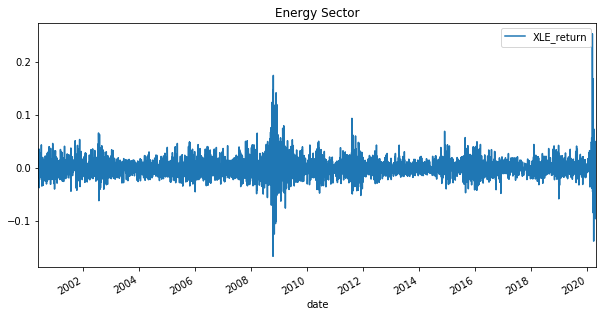

In [117]:
concat_df['XLE_return'].plot(figsize=(10,5), legend= True, title= "Energy Sector")

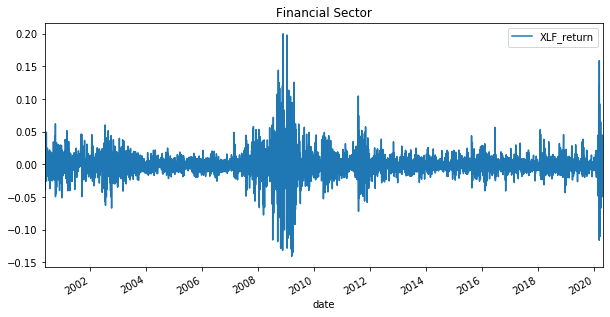

In [118]:
concat_df['XLF_return'].plot(figsize=(10,5), legend= True, title="Financial Sector")

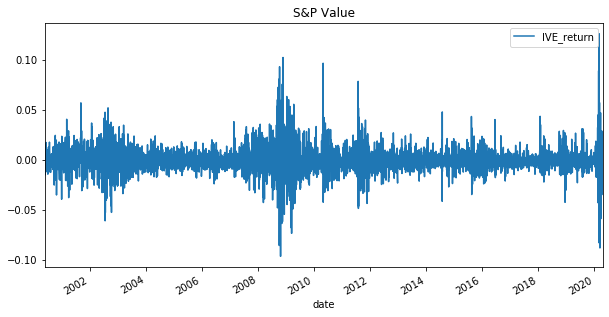

In [119]:
concat_df['IVE_return'].plot(figsize=(10,5), legend= True, title= "S&P Value")

In [120]:
cumulative_returns_xle = (1 + daily_returns_xle).cumprod()
cumulative_returns_xlf = (1 + daily_returns_xlf).cumprod()
cumulative_returns_ive =(1+ daily_returns_ive).cumprod()
cumulative_returns_xle.head()

date
2020-04-29         NaN
2020-04-28    0.930316
2020-04-27    0.909488
2020-04-24    0.890203
2020-04-23    0.888146
Name: 5. adjusted close, dtype: float64

In [125]:
#umulative_returns_xle.rename(columns={'5. adjusted close':'XLE'})
#cumulative_returns_xle

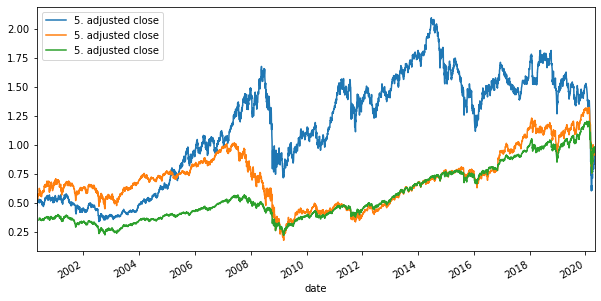

In [126]:
cumulative_returns_xle.plot(figsize=(10,5), legend= True)
cumulative_returns_xlf.plot(figsize=(10,5), legend= True)
cumulative_returns_ive.plot(figsize= (10,5), legend= True)

In [ ]:
#need to rename 